In [1]:
from numpy import meshgrid, linspace, NaN
from matplotlib.pyplot import subplots, close, figure
from matplotlib.patches import Circle
import matplotlib.gridspec as gridspec

In [2]:
x = linspace(-1,1,128)
y = linspace(-1,1,128)
X, Y = meshgrid(x,y)
Z = X + 1.j*Y
Zc = X - 1.j*Y

w: 5.0


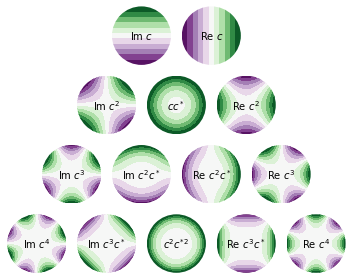

In [3]:
maxM = 4
levels = linspace(-1,1,12)  # 8: pop-art, 16: smooth
#fig, axo = subplots(maxM+1, maxM+1, sharex=True, sharey=True, figsize=(8, 8))
hor, vert = (maxM+1)*2, maxM
h = 4  # 6
w = h*(hor/vert)/2
print('w:', w)
fig = figure(figsize=(w, h))

gs = fig.add_gridspec(vert, hor)

def labelformat(p, q):
    if p==1 and q==0:
        return '$c$'
    elif p==0 and q==1:
        return '$c^*$'
    elif p==1 and q==1:
        return '$c c^*$'
    if q==0:
        return f'$c^{p}$'
    elif q==1:
        return f'$c^{p} c^*$'
    else:
        return '$c^%i c^{*%i}$' % (p, q)

# ax = axo.flat
for p in range(maxM+1):
    for q in range(maxM+1):
        m = p + q
        if m > maxM or m < 1:
            continue
        n = p-q
        #print(m,n)
        #ax=axo[p,q]
        ax = fig.add_subplot(gs[m-1, maxM-n:maxM-n+2])

        ax.set_axis_off()
        if p==0 and q==0:
            continue
        if p>q:
            F = (Z**p * Zc**q).imag
            label= f'Im {labelformat(p,q)}'
        elif p<q:
            F = (Z**q * Zc**p).real
            label= f'Re {labelformat(q,p)}'
        else:
            F = (Z*Zc).real**p
            label= labelformat(p,p) 
        #ax.pcolormesh(X, Y, F.imag if p>q else F.real, cmap='PRGn', vmin=-1, vmax=1, shading='nearest')
        cont = ax.contourf(X, Y, F, cmap='PRGn', levels=levels)
        ax.text(0,0, label, ha='center', va='center')
        circ = Circle((0,0), radius=1, transform=ax.transData)        
        #ax.quiver(X, Y, p*X**(p-1) * Y**q, X**p * q * Y**(q-1))
        # add the patch to the axes
        for col in cont.collections:
            col.set_clip_path(circ)
fig.tight_layout()
fig.savefig('inPlanePotentials.pdf')

In [4]:
close(fig)
from sympy import expand, re, im, var, I, Symbol, factorial

In [5]:
x=Symbol('x', real=True)
y=Symbol('y', real=True)
z=x+I*y
zc=x-I*y
for m in range(1,5):
    print(f'--------------------------------------order {m}----------------------------------')
    for q in range(m):
        p=m-q
        if p<q:
            continue
        F = expand(z**p * zc**q / (p+q))
        striFr = re(F).__str__().replace('**','^').replace('/', ' /')
        striFi = im(F).__str__().replace('**','^').replace('/', ' /')
        print(f'Im F[{p},{q}] = {striFi:32},  Re F[{p},{q}] = {striFr:32}')

--------------------------------------order 1----------------------------------
Im F[1,0] = y                               ,  Re F[1,0] = x                               
--------------------------------------order 2----------------------------------
Im F[2,0] = x*y                             ,  Re F[2,0] = x^2 /2 - y^2 /2                 
Im F[1,1] = 0                               ,  Re F[1,1] = x^2 /2 + y^2 /2                 
--------------------------------------order 3----------------------------------
Im F[3,0] = x^2*y - y^3 /3                  ,  Re F[3,0] = x^3 /3 - x*y^2                  
Im F[2,1] = x^2*y /3 + y^3 /3               ,  Re F[2,1] = x^3 /3 + x*y^2 /3               
--------------------------------------order 4----------------------------------
Im F[4,0] = x^3*y - x*y^3                   ,  Re F[4,0] = x^4 /4 - 3*x^2*y^2 /2 + y^4 /4  
Im F[3,1] = x^3*y /2 + x*y^3 /2             ,  Re F[3,1] = x^4 /4 - y^4 /4                 
Im F[2,2] = 0                       